# Time Series Analysis 2

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from statsmodels.tsa.arima_model import ARMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.stattools import acf,adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima_process import ArmaProcess
# Time Series Decomposition
import statsmodels.api as sm

# Import the stock data and plot it

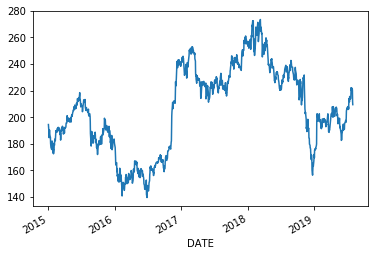

In [4]:
main_data=pd.read_csv('GS.txt',sep='\s*,\s*',index_col='DATE',engine='python')
main_data.index=pd.to_datetime(main_data.index,format='%Y%m%d')
main_data.head()

# Normal Returns
main_data['Return']=main_data['CLOSE'].pct_change(1)
# Log Returns
main_data['Log Returns'] = np.log((main_data['CLOSE']/main_data['CLOSE'].shift(1)))
# Volume Change
main_data['Volume Change'] = main_data['VOL'].pct_change(1)

main_data=main_data.dropna()

data=main_data[main_data.index.year>=2015]

data['CLOSE'].plot()

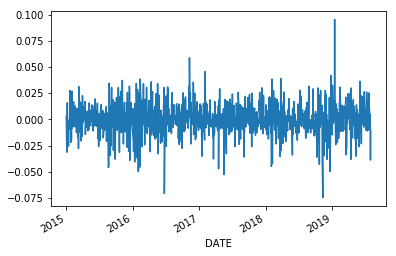

In [5]:
data['Return'].plot()

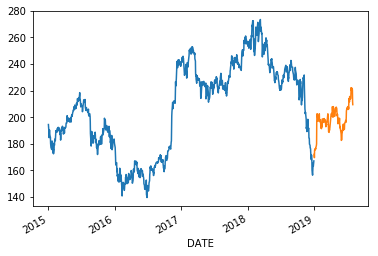

In [6]:
data_train=data.loc[:'2018']
data_test=data.loc['2019':]


# Create an axis
fig, ax = plt.subplots()

# Plot the train and test sets and show them
data_train['CLOSE'].plot(ax=ax)
data_test['CLOSE'].plot(ax=ax)
plt.show()

# Check for Stationarity of Returns

In [7]:
print("******")
# Check for stationarity for stock price
result=adfuller(data['Return'])

# Print test statistic
print(result[0])

print("Returns are Stationarity")
# Print p-value
print(result[1])

# Print critical values
print(result[4]) 

******
-33.52997944857873
Returns are Stationarity
0.0
{'1%': -3.4360342309571053, '5%': -2.864049975956835, '10%': -2.568106371425197}


# Check for Stationarity of Log Returns

In [8]:
print("******")
# Check for stationarity for stock price
result=adfuller(data['Log Returns'])

# Print test statistic
print(result[0])

print("Returns are Stationarity")
# Print p-value
print(result[1])

# Print critical values
print(result[4]) 

******
-33.51404232707574
Returns are Stationarity
0.0
{'1%': -3.4360342309571053, '5%': -2.864049975956835, '10%': -2.568106371425197}


# Auto-Regressive Models (AR Model)

A time series is regressed on the previous values and the previous shock terms. 

Y(t)= Alpha(1)*Y(t-1) + M(1)*Epsilon(t-1) + Epsilon(t)

Epsilon(t-1) = Shock term at the previous time step
Epsilon(t) = Shock term at the current time step

ARMA(1,1) Model 
Y(t)= Alpha(1)*Y(t-1) + M(1)*Epsilon(t-1) + Epsilon(t)

ARMA(p,q) Model

## Running an examplre of ARMA process 

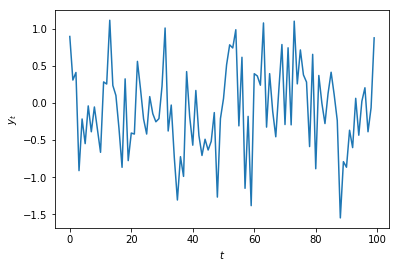

In [9]:
from statsmodels.tsa.arima_process import arma_generate_sample
np.random.seed(3)

ar_coef=[1,0.2]
ma_coef=[1,0.3,0.4]

y=arma_generate_sample(ar_coef,ma_coef,nsample=100,sigma=0.5)
plt.plot(y)
plt.ylabel(r'$y_t$')
plt.xlabel(r'$t$')
plt.show()

In [10]:
model=ARMA(y,order=(1,2))
result=model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                      y   No. Observations:                  100
Model:                     ARMA(1, 2)   Log Likelihood                 -78.440
Method:                       css-mle   S.D. of innovations              0.529
Date:                Wed, 04 Sep 2019   AIC                            166.881
Time:                        16:01:07   BIC                            179.907
Sample:                             0   HQIC                           172.153
                                                                              
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0700      0.082     -0.854      0.395      -0.231       0.091
ar.L1.y       -0.1232      0.244     -0.504      0.615      -0.602       0.356
ma.L1.y        0.2888      0.226      1.280      0.204      -0.154       0.731
ma.L2.y        0.4607      0.098      4.718      0.000       0.269       0.652
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1           -8.1179           +0.0000j            8.1179            0.5000
MA.1           -0.3135           -1.4396j            1.4734           -0.2841
MA.2           -0.3135           +1.4396j            1.4734            0.2841
-----------------------------------------------------------------------------
"""

In [11]:
def ARMA_func(timeseries,p,q):
    model=ARMA(data['Log Returns'],order=(p,q))
    return model.fit()
    

In [32]:
import warnings
warnings.filterwarnings("ignore", message="A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.")

res=ARMA_func(data.CLOSE,1,1)
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:            Log Returns   No. Observations:                 1154
Model:                     ARMA(1, 1)   Log Likelihood                3200.042
Method:                       css-mle   S.D. of innovations              0.015
Date:                Wed, 04 Sep 2019   AIC                          -6392.084
Time:                        16:25:59   BIC                          -6371.880
Sample:                             0   HQIC                         -6384.459
                                                                              
=====================================================================================
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const              6.695e-05      0.000      0.149      0.881      -0.001       0.001
ar.L1.Log Returns    -0.4990      1.319     -0.378      0.705      -3.083       2.085
ma.L1.Log Returns     0.5099      1.309      0.390      0.697      -2.055       3.075
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1           -2.0039           +0.0000j            2.0039            0.5000
MA.1           -1.9613           +0.0000j            1.9613            0.5000
-----------------------------------------------------------------------------
"""

In [34]:
res=ARMA_func(data['Return'],3,0)
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:            Log Returns   No. Observations:                 1154
Model:                     ARMA(3, 0)   Log Likelihood                3200.039
Method:                       css-mle   S.D. of innovations              0.015
Date:                Wed, 04 Sep 2019   AIC                          -6390.079
Time:                        16:26:29   BIC                          -6364.824
Sample:                             0   HQIC                         -6380.547
                                                                              
=====================================================================================
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const              6.645e-05      0.000      0.147      0.883      -0.001       0.001
ar.L1.Log Returns     0.0120      0.029      0.408      0.683      -0.046       0.070
ar.L2.Log Returns     0.0010      0.030      0.033      0.974      -0.057       0.059
ar.L3.Log Returns     0.0024      0.030      0.082      0.935      -0.056       0.060
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            7.1085           -0.0000j            7.1085           -0.0000
AR.2           -3.7541           -6.6527j            7.6388           -0.3318
AR.3           -3.7541           +6.6527j            7.6388            0.3318
-----------------------------------------------------------------------------
"""

In [35]:
res=ARMA_func(data['Return'],3,1)
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:            Log Returns   No. Observations:                 1154
Model:                     ARMA(3, 1)   Log Likelihood                3200.095
Method:                       css-mle   S.D. of innovations              0.015
Date:                Wed, 04 Sep 2019   AIC                          -6388.191
Time:                        16:26:44   BIC                          -6357.885
Sample:                             0   HQIC                         -6376.753
                                                                              
=====================================================================================
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const              4.766e-05      0.000      0.105      0.917      -0.001       0.001
ar.L1.Log Returns    -0.3896      0.903     -0.431      0.666      -2.160       1.381
ar.L2.Log Returns     0.0066      0.034      0.195      0.845      -0.060       0.073
ar.L3.Log Returns     0.0096      0.030      0.324      0.746      -0.048       0.068
ma.L1.Log Returns     0.4034      0.903      0.447      0.655      -1.367       2.174
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1           -3.2040           +0.0000j            3.2040            0.5000
AR.2           -4.5777           +0.0000j            4.5777            0.5000
AR.3            7.0922           +0.0000j            7.0922            0.0000
MA.1           -2.4789           +0.0000j            2.4789            0.5000
-----------------------------------------------------------------------------
"""

# ARMAX - ARMA + Linear regression(with any variable)

In [36]:
ts=data.CLOSE.values
volume_change=data['Volume Change'].values
model=ARMA(ts,order=(1,1),exog=data['Volume Change'])
result=model.fit()
print(result.summary())

                              ARMA Model Results                              
Dep. Variable:                      y   No. Observations:                 1154
Model:                     ARMA(1, 1)   Log Likelihood               -2919.914
Method:                       css-mle   S.D. of innovations              3.032
Date:                Wed, 04 Sep 2019   AIC                           5849.828
Time:                        16:26:49   BIC                           5875.083
Sample:                             0   HQIC                          5859.360
                                                                              
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const           205.0557     14.536     14.107      0.000     176.566     233.545
Volume Change    -0.3961      0.130     -3.049      0.002      -0.651      -0.141
ar.L1.y           0.9945      0.003    3

# Forecasting

In [37]:
ts=data['CLOSE']
model=SARIMAX(ts,order=(3,0,3),trend='c')
result=model.fit()
print(result.summary())

one_step_forecast=result.get_prediction(start=-30)
mean_forecast=one_step_forecast.predicted_mean
conf_intercal=one_step_forecast.conf_int()


# Select lower and upper confidence limits
lower_limits = confidence_intervals.loc[:,'lower CLOSE']
upper_limits = confidence_intervals.loc[:,'upper CLOSE']


                           Statespace Model Results                           
Dep. Variable:                  CLOSE   No. Observations:                 1154
Model:               SARIMAX(3, 0, 3)   Log Likelihood               -2922.510
Date:                Wed, 04 Sep 2019   AIC                           5861.020
Time:                        16:26:53   BIC                           5901.428
Sample:                             0   HQIC                          5876.271
                               - 1154                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      2.5082      1.429      1.755      0.079      -0.293       5.310
ar.L1          0.3875      0.140      2.761      0.006       0.112       0.663
ar.L2         -0.2359      0.162     -1.453      0.1

C:\Program Files\anaconda\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


NameError: name 'confidence_intervals' is not defined

In [ ]:
plt.figure(figsize=(30,20)) 

# plot the amazon data
plt.plot(data['CLOSE'].index, data['CLOSE'], label='observed')

# plot your mean predictions
plt.plot(mean_forecast.index, mean_forecast.values, color='r', label='forecast')

# shade the area between your confidence limits
plt.fill_between(lower_limits.index, lower_limits,upper_limits, color='pink')

# set labels, legends and show plot
plt.xlabel('Date')
plt.ylabel('Amazon Stock Price - Close USD')
plt.legend()
plt.show()

# Dynamic Forecast

In [ ]:
# Generate predictions
dynamic_forecast = result.get_prediction(start=-30, dynamic=True)

# Extract prediction mean
mean_forecast = dynamic_forecast.predicted_mean

# Get confidence intervals of predictions
confidence_intervals = dynamic_forecast.conf_int()

# Select lower and upper confidence limits
lower_limits = confidence_intervals.loc[:,'lower CLOSE']
upper_limits = confidence_intervals.loc[:,'upper CLOSE']

plt.figure(figsize=(30,20)) 

# plot the amazon data
plt.plot(data['CLOSE'].index, data['CLOSE'], label='observed')

# plot your mean predictions
plt.plot(mean_forecast.index, mean_forecast.values, color='r', label='forecast')

# shade the area between your confidence limits
plt.fill_between(lower_limits.index, lower_limits,upper_limits, color='pink')

# set labels, legends and show plot
plt.xlabel('Date')
plt.ylabel('Amazon Stock Price - Close USD')
plt.legend()
plt.show()

## If you haven't noticed the above modelling we have done is wrong. Can you guess why ? The answer is Stationarity. 

## We can do any kind of modelling only when a time series is stationary which was not in our case as we were using closing prices. So the solution is that we model the returns using ARMA and we do a CUMSUM of the predicted returns and then we add them to the last Closing price to plot the series. Same goes for the interval.

## Or we can make uses of another model known as ARIMA which is Integrated Auto regression moving average model. It does everything for us iteselg.

## p = order for AR
## d = order of differencing to make series stationary
## q = order for MA

In [38]:
model=SARIMAX(data['Log Returns'],order=(1,0,2))
result=model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Statespace Model Results                           
==============================================================================
Dep. Variable:            Log Returns   No. Observations:                 1154
Model:               SARIMAX(1, 0, 2)   Log Likelihood                3199.994
Date:                Wed, 04 Sep 2019   AIC                          -6391.988
Time:                        16:26:54   BIC                          -6371.784
Sample:                             0   HQIC                         -6384.362
                               - 1154                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.2820      3.682      0.077      0.939      -6.935       7.500
ma.L1         -0.2712      3.682     -0.074      0.941      -7.488       6.946
ma.L2          0.0035      0.053      0.065      0.948      -0.101       0.108
sigma2         0.0002   6.21e-06     36.780      0.000       0.000       0.000
===================================================================================
Ljung-Box (Q):                       32.89   Jarque-Bera (JB):               377.14
Prob(Q):                              0.78   Prob(JB):                         0.00
Heteroskedasticity (H):               1.01   Skew:                            -0.25
Prob(H) (two-sided):                  0.90   Kurtosis:                         5.76
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [40]:
arma_diff_forecast=result.get_forecast(steps=10).predicted_mean
arma_int_forecast=np.cumsum(arma_diff_forecast)
arma_predicited_prices=arma_int_forecast+data['CLOSE'][-1]


arma_predicited_prices

C:\Program Files\anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:531: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  ValueWarning)


1154    209.369622
1155    209.369480
1156    209.369440
1157    209.369429
1158    209.369426
1159    209.369425
1160    209.369424
1161    209.369424
1162    209.369424
1163    209.369424
dtype: float64

In [41]:
model=SARIMAX(data['CLOSE'],order=(1,1,2))
result=model.fit()
arma_predicted_prices=result.get_forecast(steps=10).predicted_mean

arma_predicted_prices

C:\Program Files\anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:531: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  ValueWarning)


1154    209.377935
1155    209.411103
1156    209.430237
1157    209.441275
1158    209.447643
1159    209.451316
1160    209.453435
1161    209.454657
1162    209.455362
1163    209.455769
dtype: float64

# Look into test-statistics and P-values to find the best model. Over differencing the data can be meaningless.

# Analyzing time series to analyse the nature of time series, AR, MA, ARMA

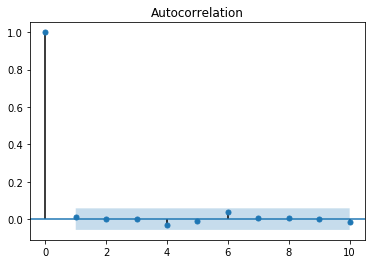

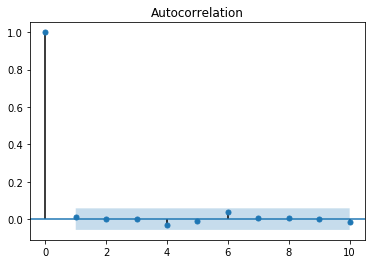

In [42]:
plot_acf(data['Return'],lags=10)
plt.show()

plot_acf(data['Return'],lags=10)
plt.show()

In [ ]:
     AR(p)                MA(q)                  ARMA(p,q)
ACF Tails off	           Cuts off after lag q  Tails off
PACF Cuts off after lag p	Tails off	          Tails off

# AIC & BIC

In [44]:
# Create empty list to store search results
order_aic_bic=[]

# Loop over p values from 0-2
for p in range(5):
  # Loop over q values from 0-2
    for q in range(5):
      	# create and fit ARMA(p,q) model
        try: 
            model = SARIMAX(data['Return'], order=(p,0,q))
            results = model.fit()
            # Append order and results tuple
            order_aic_bic.append((p,q,results.aic,results.bic))
        except:
            print("error")

C:\Program Files\anaconda\lib\site-packages\statsmodels\tsa\statespace\representation.py:375: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return matrix[[slice(None)]*(matrix.ndim-1) + [0]]


error
error


C:\Program Files\anaconda\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


error
error


In [45]:
# Construct DataFrame from order_aic_bic
order_df = pd.DataFrame(order_aic_bic, 
                        columns=['p', 'q', 'AIC', 'BIC'])

# Print order_df in order of increasing AIC
print(order_df.sort_values('AIC'))

# Print order_df in order of increasing BIC
print(order_df.sort_values('BIC'))

    p  q          AIC          BIC
0   0  0 -6401.200643 -6396.149653
5   1  0 -6399.358324 -6389.256345
1   0  1 -6399.353089 -6389.251110
10  2  0 -6397.362441 -6382.209472
6   1  1 -6397.353113 -6382.200145
2   0  2 -6397.328857 -6382.175889
13  3  0 -6395.368083 -6375.164125
3   0  3 -6395.348725 -6375.144768
7   1  2 -6395.306854 -6375.102896
17  4  0 -6394.647632 -6369.392684
4   0  4 -6394.620445 -6369.365497
14  3  1 -6393.369166 -6368.114219
8   1  3 -6393.342758 -6368.087810
9   1  4 -6392.668779 -6362.362842
18  4  1 -6392.642846 -6362.336909
11  2  3 -6391.762694 -6361.456758
12  2  4 -6391.371023 -6356.014097
15  3  3 -6390.612407 -6355.255481
19  4  3 -6389.482817 -6349.074901
16  3  4 -6389.373905 -6348.965990
20  4  4 -6388.406244 -6342.947339
    p  q          AIC          BIC
0   0  0 -6401.200643 -6396.149653
5   1  0 -6399.358324 -6389.256345
1   0  1 -6399.353089 -6389.251110
10  2  0 -6397.362441 -6382.209472
6   1  1 -6397.353113 -6382.200145
2   0  2 -6397.32885

# Model Diagnostics

1) Common Model Diagnostics<br>
2) Focus on residuals of the training data, results.resid<br>
3) How large the residuals are?<br>
4) Calculate Mean Absolute error<br>
5) Residuals should be uncorrelated Gaussian Noise<br>
6) results.Plot_diagnostics() <br>
7) No Obvious patterns in return graph, histogram and QQ plot, ACF plot<br>
8) Jarque- Bera (JB): is the p-valie associated with null hypothesis that the residuals are Gaussian Normally Distributed<br>
9) Prob(Q) : p-value<br>

0.011106747696628812


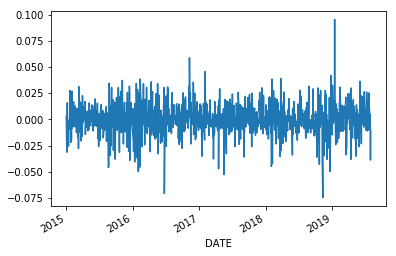

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Statespace Model Results                           
==============================================================================
Dep. Variable:                 Return   No. Observations:                 1154
Model:               SARIMAX(4, 0, 4)   Log Likelihood                3203.203
Date:                Wed, 04 Sep 2019   AIC                          -6388.406
Time:                        17:23:58   BIC                          -6342.947
Sample:                             0   HQIC                         -6371.249
                               - 1154                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0182      0.529      0.034      0.973      -1.020       1.056
ar.L2         -0.6706      0.472     -1.420      0.156      -1.596       0.255
ar.L3          0.0137      0.454      0.030      0.976      -0.877       0.905
ar.L4         -0.4561      0.472     -0.967      0.333      -1.380       0.468
ma.L1         -0.0048      0.536     -0.009      0.993      -1.056       1.047
ma.L2          0.6680      0.483      1.384      0.166      -0.278       1.614
ma.L3         -0.0021      0.466     -0.005      0.996      -0.916       0.912
ma.L4          0.4161      0.485      0.858      0.391      -0.534       1.367
sigma2         0.0002    6.4e-06     35.480      0.000       0.000       0.000
===================================================================================
Ljung-Box (Q):                       30.41   Jarque-Bera (JB):               399.85
Prob(Q):                              0.86   Prob(JB):                         0.00
Heteroskedasticity (H):               1.03   Skew:                            -0.16
Prob(H) (two-sided):                  0.79   Kurtosis:                         5.87
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [57]:
model=SARIMAX(data['Return'],order=(4,0,4))
results=model.fit()

mae=np.mean(np.abs(results.resid))
print(mae)

data['Return'].plot()
plt.show()

results.summary()

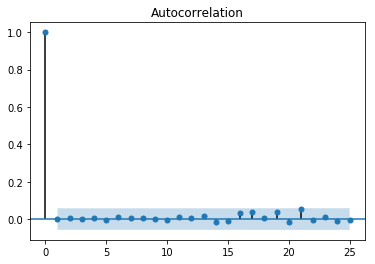

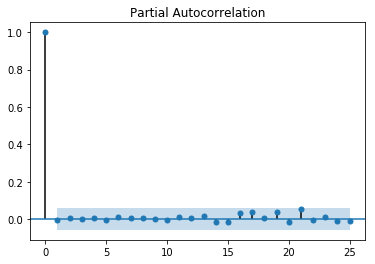

In [65]:
plot_acf(results.resid,lags=25)
plot_pacf(results.resid,lags=25)
plt.show()

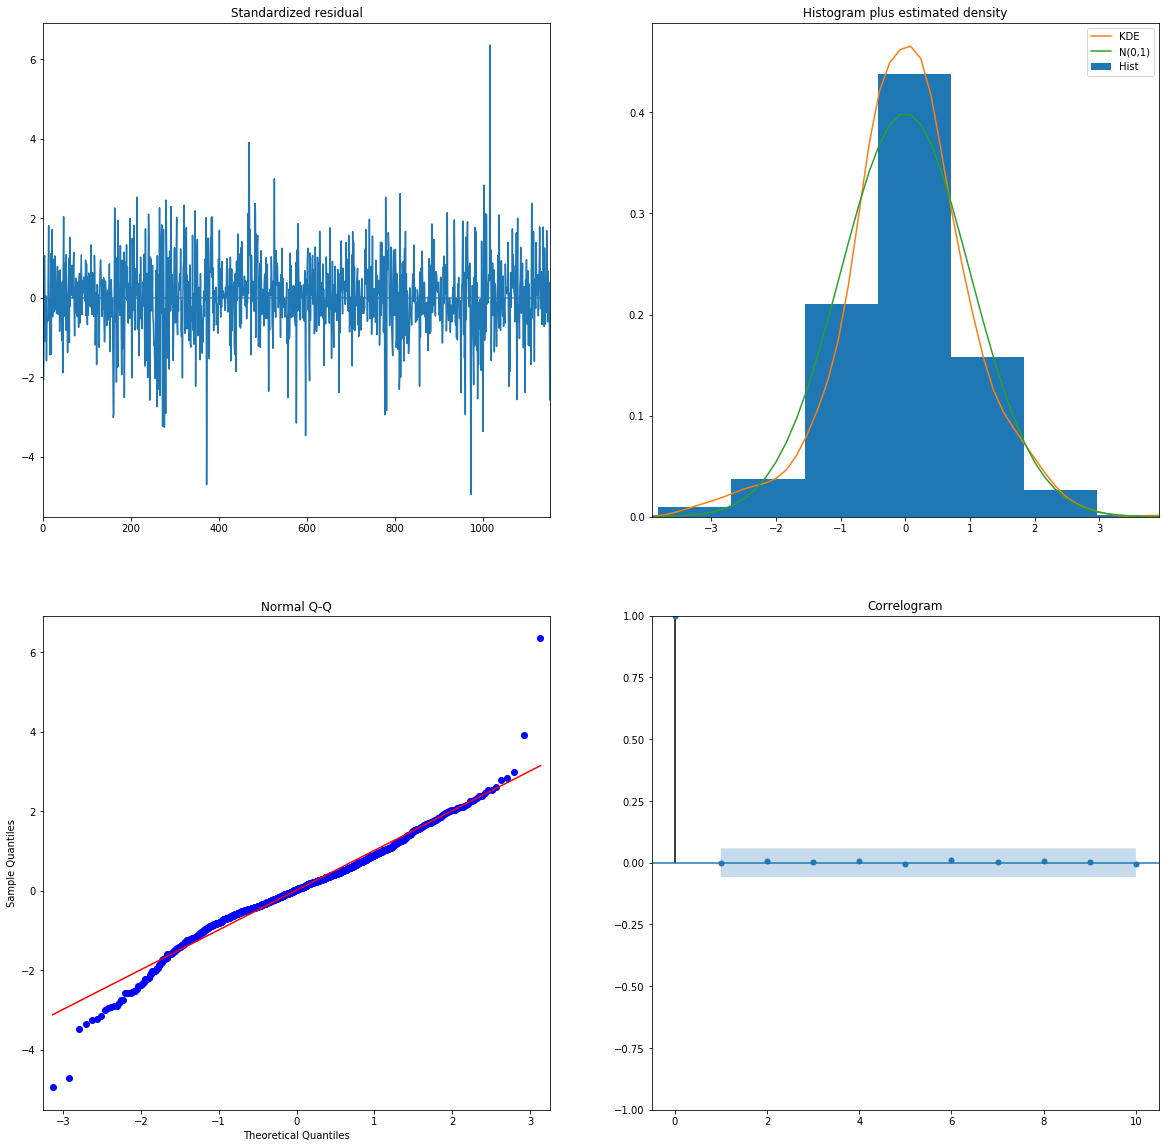

In [67]:
results.plot_diagnostics(figsize=(20,20))
plt.show()

# Box Jenkins Method
## From raw data to production model

1) Identification - Stationarity, Transformation(diff,log),identify (p,q) are best, use adf test, diff(), np.log(), plot_acf(), plot_pacf()<br>
2) Estimation - model.fit(), AIC and BIC to narrow down on best models<br>
3) Model Diagnostics - model.summary(),model.plot_diagnostics(), if residuals are good that's it or go back <br>

In [ ]:
# Plot time series
savings.plot()
plt.show()

# Run Dicky-Fuller test
result = adfuller(savings.iloc[:,0])

# Print test statistic
print(result[0])

# Print p-value
print(result[1])

In [ ]:

# Create figure
fig, (ax1, ax2) = plt.subplots(2,1, figsize=(12,8))
 
# Plot the ACF of savings on ax1
plot_acf(savings,zero=False,lags=10,ax=ax1)

# Plot the PACF of savings on ax2
ax2=plot_pacf(savings,zero=False,lags=10,ax=ax2)

plt.show()

In [ ]:
# Loop over p values from 0-3
for p in range(4):
  
  # Loop over q values from 0-3
    for q in range(4):
      try:
        # Create and fit ARMA(p,q) model
        model = SARIMAX(savings, order=(p,0,q), trend='c')
        results = model.fit()
        
        # Print p, q, AIC, BIC
        print(p,q,results.aic,results.bic)
        
      except:
        print(p, q, None, None)

In [ ]:
# Create and fit model
model = SARIMAX(savings,order=(1,0,2),trend='c')
results = model.fit()

# Create the 4 diagostics plots
results.plot_diagnostics()
plt.show()

# Print summary
print(results.summary())